### Normal Equation

In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

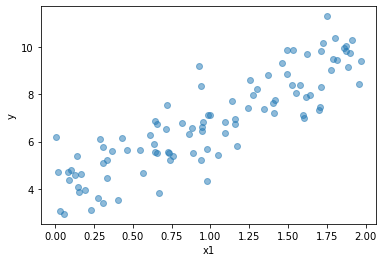

In [4]:
plt.scatter(X.flatten(), y.flatten(), alpha=0.5)
plt.xlabel('x1')
plt.ylabel('y')

In [5]:
## adding x0 = 1 to each observation in X matrix
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best # ideal x0 = 4, x1 = 3 as per y function

array([[3.88971297],
       [2.94440327]])

In [7]:
intercept = theta_best[0]
theta_1 = theta_best[1]

### Making Predictions

In [8]:
X_new = np.array([[0], [2]]) # x1 = [0, 2]
X_new_b = np.c_[np.ones((2, 1)), X_new] # add 1 to x0
y_predict = X_new_b.dot(theta_best)

In [9]:
y_predict

array([[3.88971297],
       [9.7785195 ]])

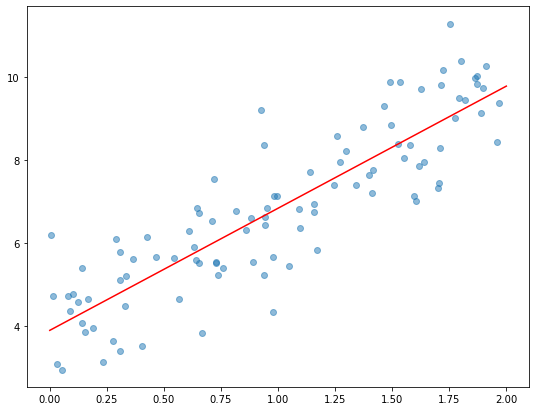

In [10]:
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 7))


ax.scatter(X.flatten(), y.flatten(), alpha=0.5)

ax.plot(X_new, y_predict, "r-")

### Using Scikit learn

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.88971297]), array([[2.94440327]]))

In [13]:
lin_reg.predict(X_new)

array([[3.88971297],
       [9.7785195 ]])

### Gradient Descent

In [14]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [15]:
# initialize theta vector randomly
theta = np.random.randn(2,1)
theta

array([[ 0.84635096],
       [-0.59218793]])

In [16]:
for iteration in range(n_iterations):
    # calculate gradient vectors
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - (eta * gradients)

In [ ]:
theta

### Stochastic Gradient Descent

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [ ]:
def learning_schedule(t):
    return t0 / (t + t1)

In [ ]:
theta = np.random.randn(2,1) # random initialisation of theta vector

In [ ]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1] # slice to keep (n, m) shape
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - (eta * gradients)
        

In [ ]:
theta

In [ ]:
# using SGDRegressor (uses Squared Error Cost Function)
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

In [24]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.86958179]), array([2.96369707]))

### Polynomial Regression

In [25]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

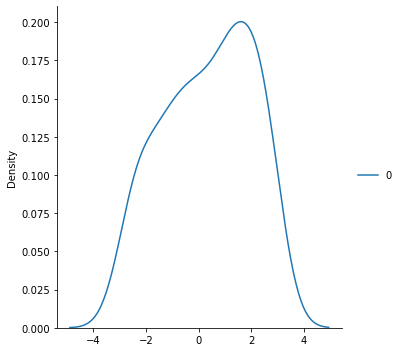

In [26]:
sns.displot(X, kind='kde')

<AxesSubplot:>

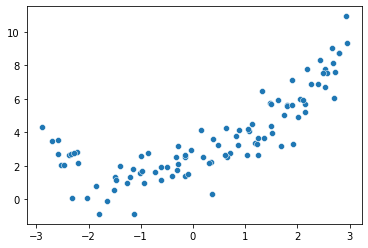

In [27]:
sns.scatterplot(x=X.flatten(), y=y.flatten())

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [30]:
X_poly = poly_features.fit_transform(X)

In [31]:
X[0], X_poly[0]

(array([0.19454505]), array([0.19454505, 0.03784778]))

In [32]:
# fit a Lin Reg model with the extended data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.05814542]), array([[1.04309185, 0.4530643 ]]))

In [33]:
# 1.96 + 0.96x1 + 0.49x2**2

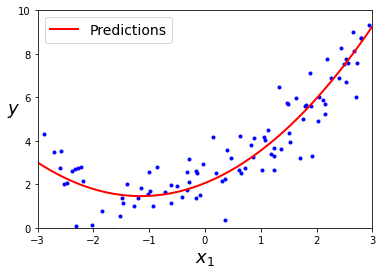

In [34]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### Learning Curves

In [35]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

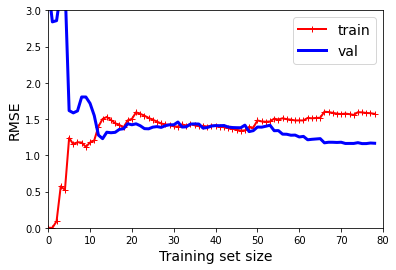

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.show()                                      

### Regularized Linear Models

In [37]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

<AxesSubplot:>

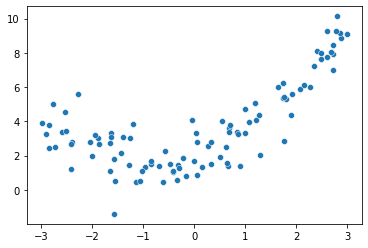

In [38]:
sns.scatterplot(x=X.flatten(), y=y.flatten())

### Ridge Regression

In [39]:
from sklearn.linear_model import Ridge
# using closed-form solution
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_poly, y)
ridge_reg.predict([X_poly[0]])

array([[3.84814393]])

In [40]:
# using closed-form solution
ridge_reg = Ridge(alpha=1, solver='sag')
ridge_reg.fit(X_poly, y)
ridge_reg.predict([X_poly[0]])

array([[3.84808123]])

In [41]:
# using Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X_poly, y.ravel())
sgd_reg.predict([X_poly[0]])

array([3.75003884])

In [42]:
y[0]

array([2.23944793])

### Lasso Regression

In [43]:
from sklearn.linear_model import Lasso
# using closed-form solution
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly, y)
lasso_reg.predict([X_poly[0]])

array([3.81125319])

In [44]:
# using Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X_poly, y.ravel())
sgd_reg.predict([X_poly[0]])

array([3.52589666])

### Elastic Net Regularisation

In [45]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_poly, y)
elastic_net.predict([X_poly[0]])

array([3.8289756])

### Logistic Regression

In [46]:
from sklearn import datasets
iris = datasets.load_iris()

In [47]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [53]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) 

In [61]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [62]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

Text(0, 0.5, 'Probability')

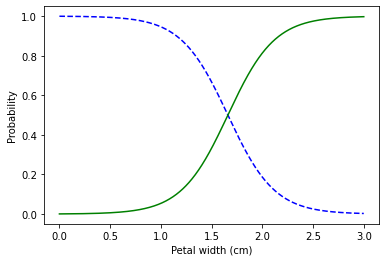

In [68]:
plt.plot(X_new, y_proba[:, 0], 'b--', label="Not Iris virginica")
plt.plot(X_new, y_proba[:, 1], 'g-', label="Iris virginica")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")

In [69]:
# checking the decision boundary around 1.6 cm pedtal width
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [70]:
# above 1.6 : Iris
# below 1.6 : Not Iris

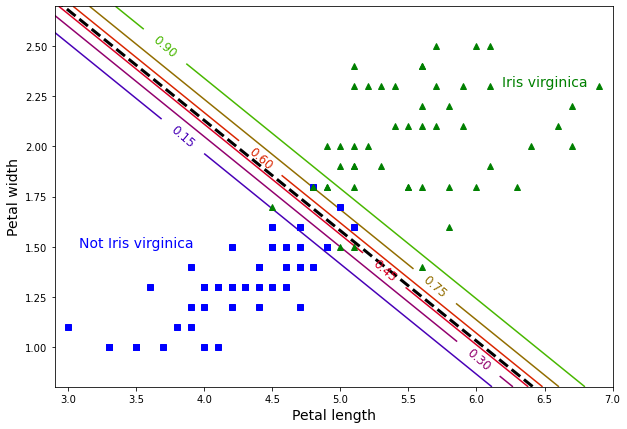

In [75]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 7))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### Softmax Regression

In [76]:
X = iris["data"][:, (2,3)] # petal length, width
y = iris["target"]

In [77]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [79]:
# making predictions
softmax_reg.predict([[5, 2]])

array([2])

In [80]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])